In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [3]:
#to avoid enconding error, i used 'unicode_escape'
train=pd.read_csv('train.csv',encoding='unicode_escape')

In [5]:
#read rows and columns
train.shape

(891, 12)

In [6]:
#read all the headers in the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
#drop unrelated/ blank colunms i.e Cabin has alot of blank columns
train.drop('Cabin',axis=1,inplace=True)

In [24]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
#check for null values
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#age and embarked has null values/ missing so i drop the null values
train.dropna(inplace=True)

In [9]:
pd.isnull(train).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
#description of the data examples(count mean e.t.c) for the whole data set train
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [11]:
#i want for countious variables only i. Age & Fare
train[['Age','Fare']].describe()

,Age,Fare
count,183.000000,183.000000
mean,35.674426,78.682469
std,15.643866,76.347843
min,0.920000,0.000000
25%,24.000000,29.700000
50%,36.000000,57.000000
75%,47.500000,90.000000
max,80.000000,512.329200


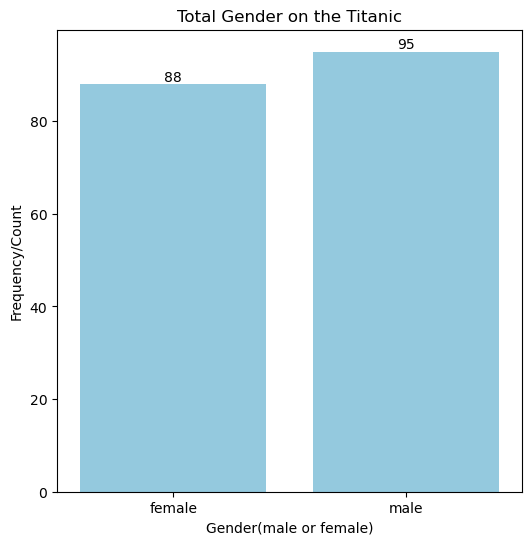

In [12]:
##EXPLORATORY DATA ANALYSIS OF TITANIC DATA SET
##Qualitative data
#CHECK total GENDER ON BOARD 
plt.figure(figsize=(6,6))
plt.title('Total Gender on the Titanic')
plt.xlabel('Gender(male or female)')
plt.ylabel('Frequency/Count')
ax = sn.countplot(x='Sex',data=train,color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)

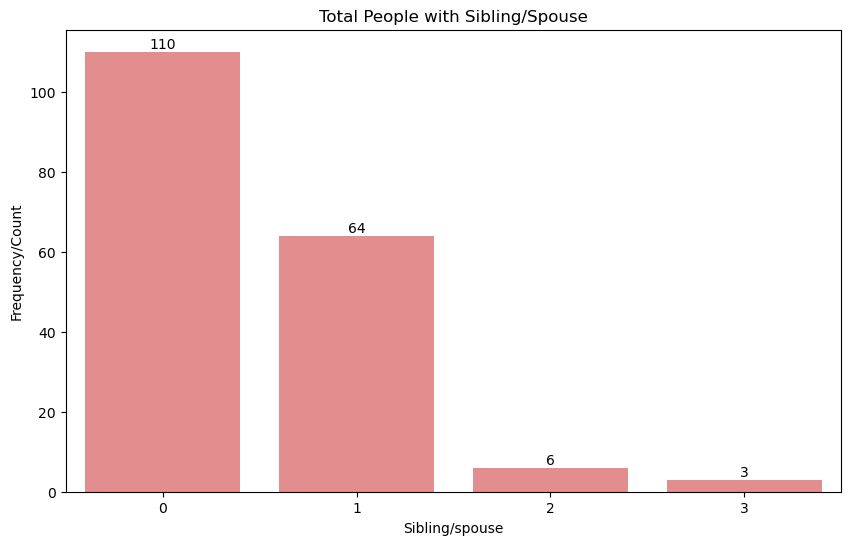

In [13]:
#check those with sibling and spouse
plt.figure(figsize=(10,6))
plt.title('Total People with Sibling/Spouse')
plt.xlabel('Sibling/spouse')
plt.ylabel('Frequency/Count')
sp=sn.countplot(x='SibSp',data=train,color='lightcoral')
for bars in sp.containers:
    sp.bar_label(bars)

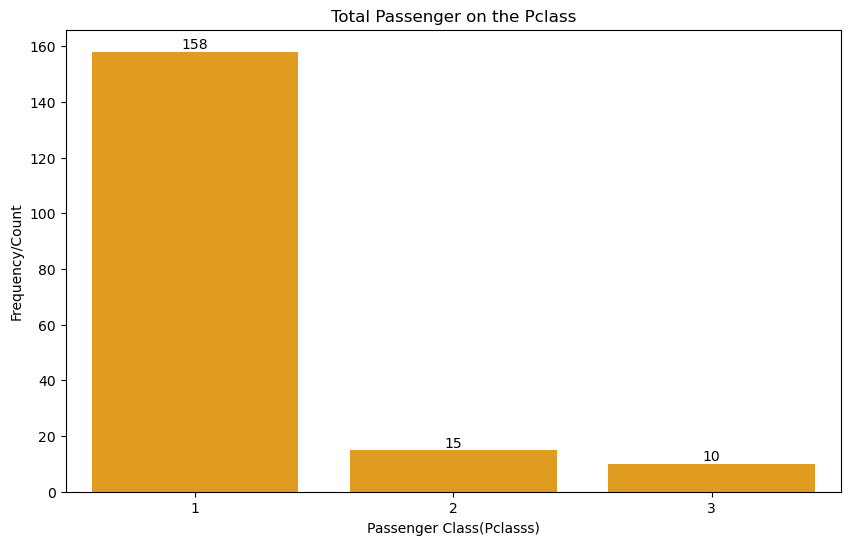

In [14]:
#check those in the passangerclass(Pclass)
plt.figure(figsize=(10,6))
plt.title('Total Passenger on the Pclass')
plt.xlabel('Passenger Class(Pclasss)')
plt.ylabel('Frequency/Count')
p=sn.countplot(x='Pclass',data=train,color='orange')
for bars in p.containers:
    p.bar_label(bars)

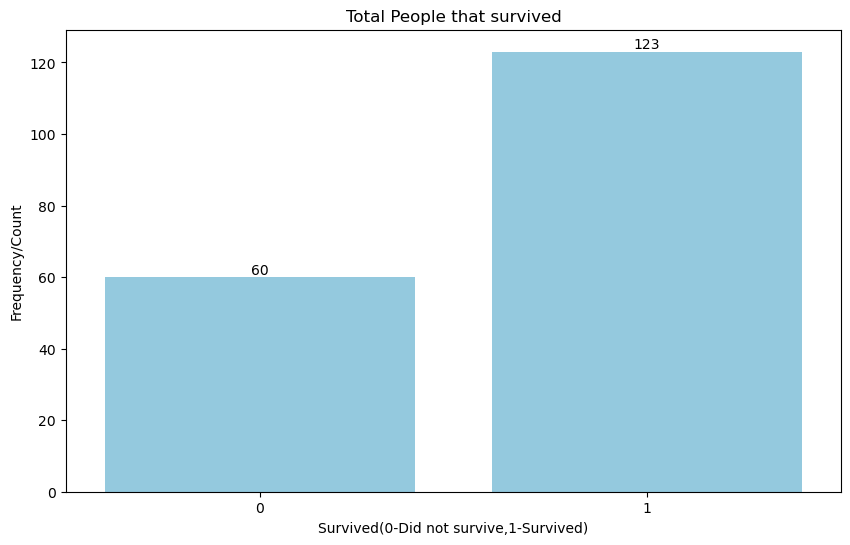

In [15]:
#check those that Survived
plt.figure(figsize=(10,6))
plt.title('Total People that survived')
plt.xlabel('Survived(0-Did not survive,1-Survived)')
plt.ylabel('Frequency/Count')
s= sn.countplot(x='Survived',data=train,color='skyblue')
for bars in s.containers:
    s.bar_label(bars)

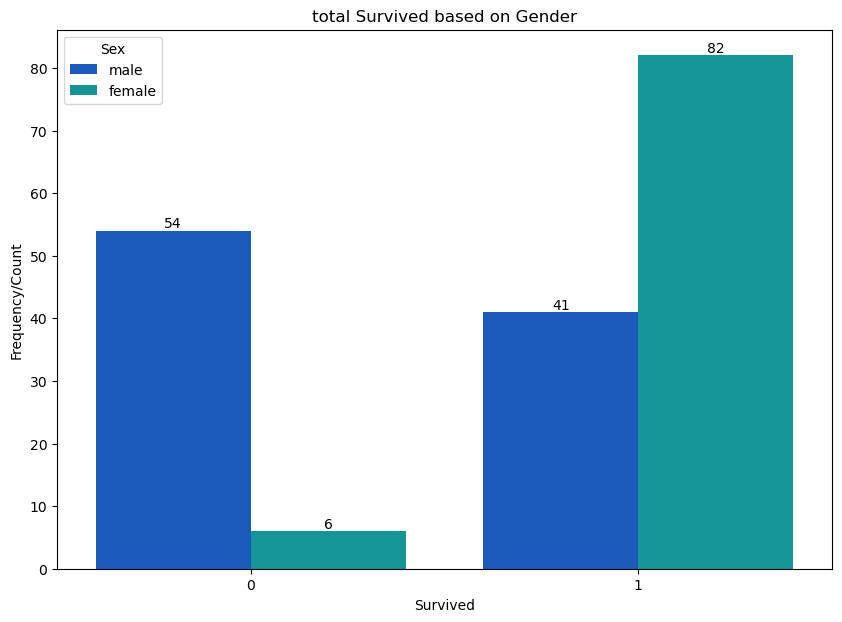

In [16]:
#check those that survived based on gender
plt.figure(figsize=(10,7))
plt.title('total Survived based on Gender')
plt.xlabel('Survived')
plt.ylabel('Frequency/Count')
SG= sn.countplot(x='Survived',hue='Sex',data=train,palette='winter')
for bars in SG.containers:
    SG.bar_label(bars)

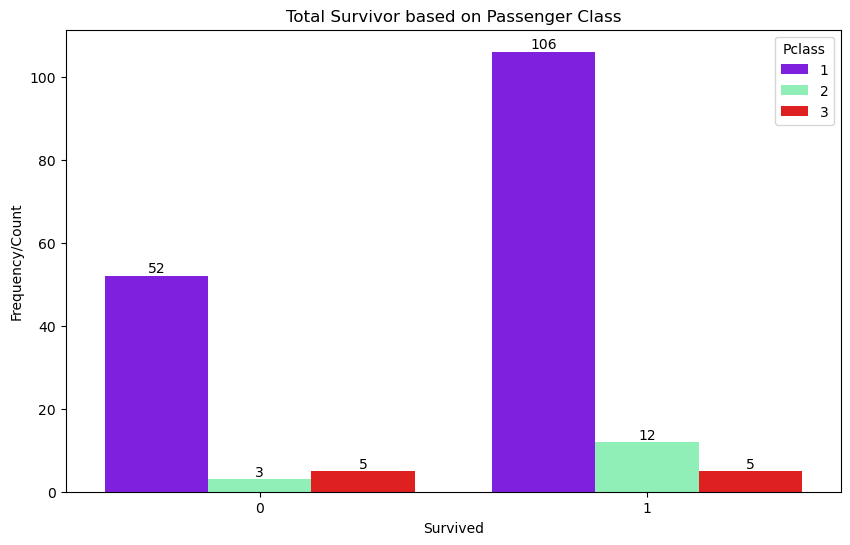

In [17]:
#check those that Survived based on the passager class on board
plt.figure(figsize=(10,6))
plt.title('Total Survivor based on Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Frequency/Count')
PS = sn.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
for bars in PS.containers:
    PS.bar_label(bars)

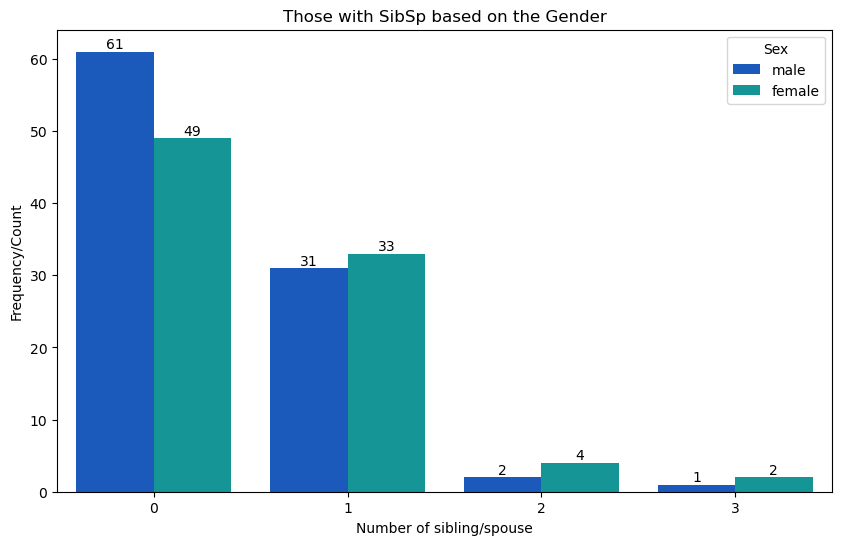

In [18]:
#check those who had sibling or spouse on the titanic board based on gender
plt.figure(figsize=(10,6))
plt.title('Those with SibSp based on the Gender')
plt.xlabel('Number of sibling/spouse')
plt.ylabel('Frequency/Count')
SS= sn.countplot(x='SibSp',hue='Sex',data=train,palette='winter')
for bars in SS.containers:
    SS.bar_label(bars)

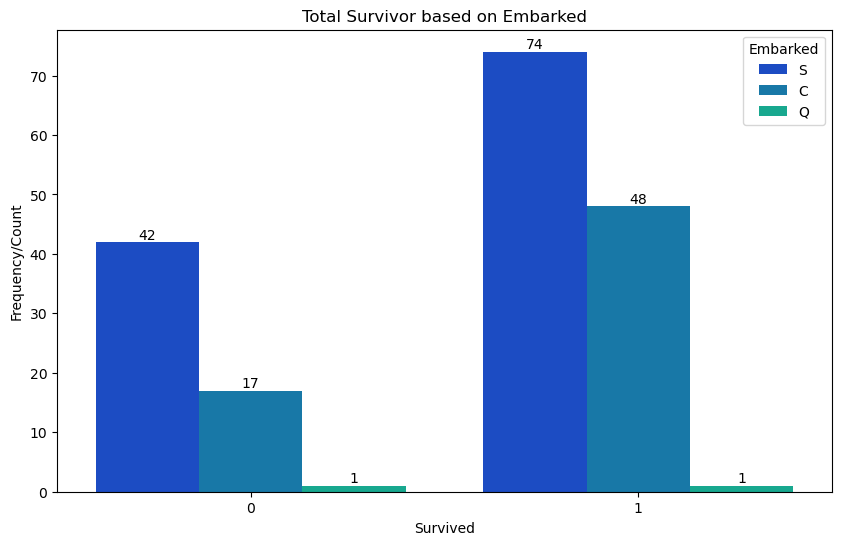

In [19]:
#check those that Survived based on the embarked variables
plt.figure(figsize=(10,6))
plt.title('Total Survivor based on Embarked')
plt.xlabel('Survived')
plt.ylabel('Frequency/Count')
SE= sn.countplot(x='Survived',hue='Embarked',data=train,palette='winter')
for bars in SE.containers:
    SE.bar_label(bars)

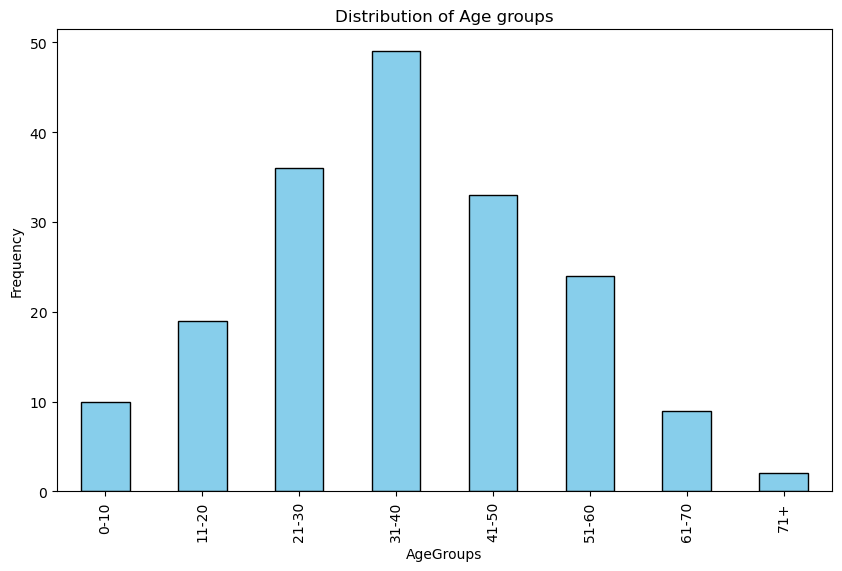

In [20]:
#quantitative data analysis
#define AGE bins and labels
Age_bins=[0,10,20,30,40,50,60,70,80]
Age_labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71+']
#create a new column 'Agegroup' with binned data
train['AgeGroup']= pd.cut(train['Age'], bins= Age_bins,labels= Age_labels,right=False)
#plotting the histogram
histogram= plt.figure(figsize=(10,6))
train['AgeGroup'].value_counts(sort=False).plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Distribution of Age groups')
plt.xlabel('AgeGroups')
plt.ylabel('Frequency')
plt.show()

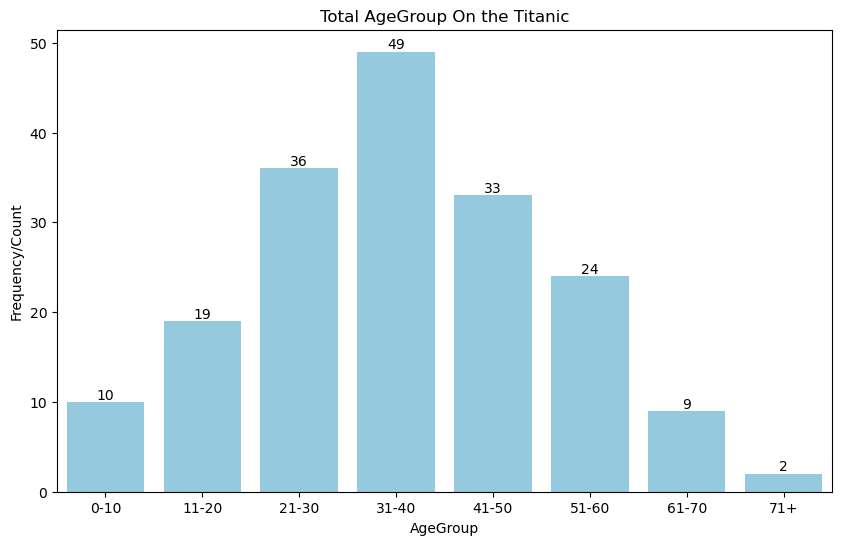

In [21]:
#counts on each age group
plt.figure(figsize=(10,6))
plt.title('Total AgeGroup On the Titanic')
plt.xlabel('AgeGroup')
plt.ylabel('Frequency/Count')
Ag=sn.countplot(x='AgeGroup',data=train, color='skyblue')
for bars in Ag.containers:
    Ag.bar_label(bars)

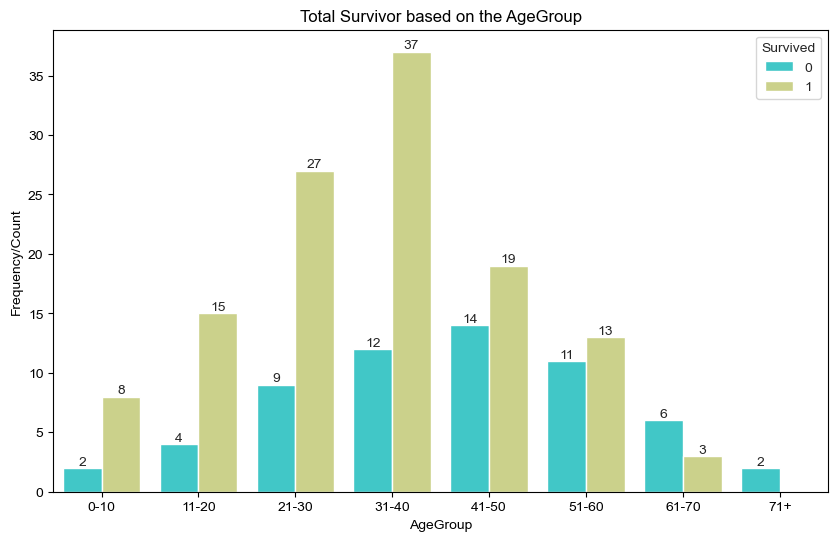

In [22]:
##check if there is a relationship between those that survived and there age group
plt.figure(figsize=(10,6))
plt.title('Total Survivor based on the AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Frequency/Count')
sn.set_style('whitegrid')
SA = sn.countplot(x='AgeGroup',hue='Survived',data=train,palette='rainbow')
for bars in SA.containers:
    SA.bar_label(bars)

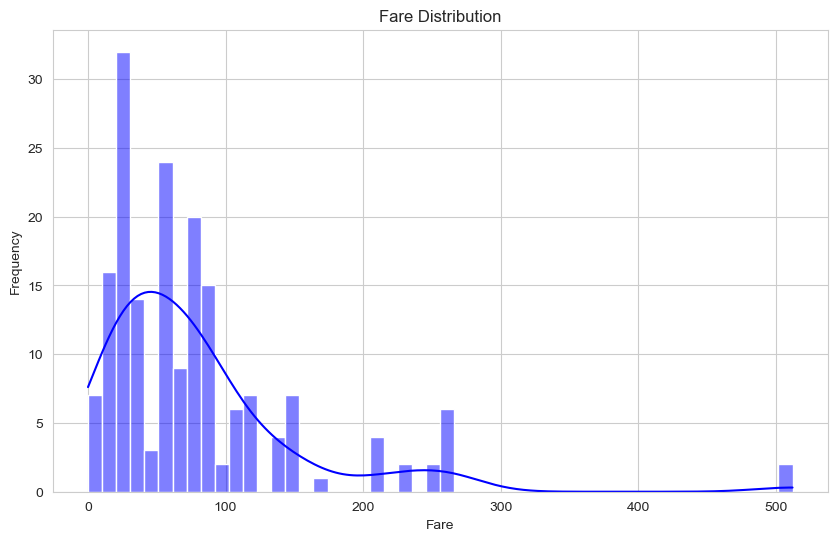

In [23]:
##distribution of Fare
plt.figure(figsize=(10,6))
sn.histplot(train['Fare'],bins=50,kde=True,color='blue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

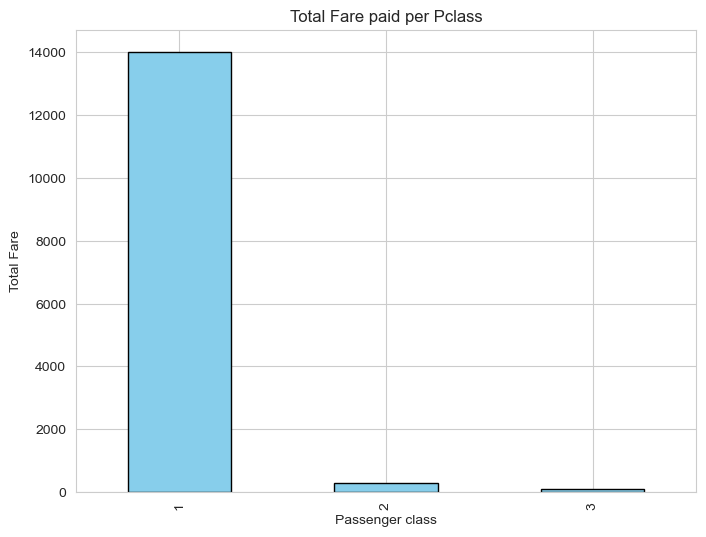

In [24]:
#check the total Fare and passenger class
#group by Pclass and sum the fares
fare_by_class=train.groupby('Pclass')['Fare'].sum()
hist=plt.figure(figsize=(8,6))
fare_by_class.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Total Fare paid per Pclass')
plt.xlabel('Passenger class')
plt.ylabel('Total Fare')
plt.show()

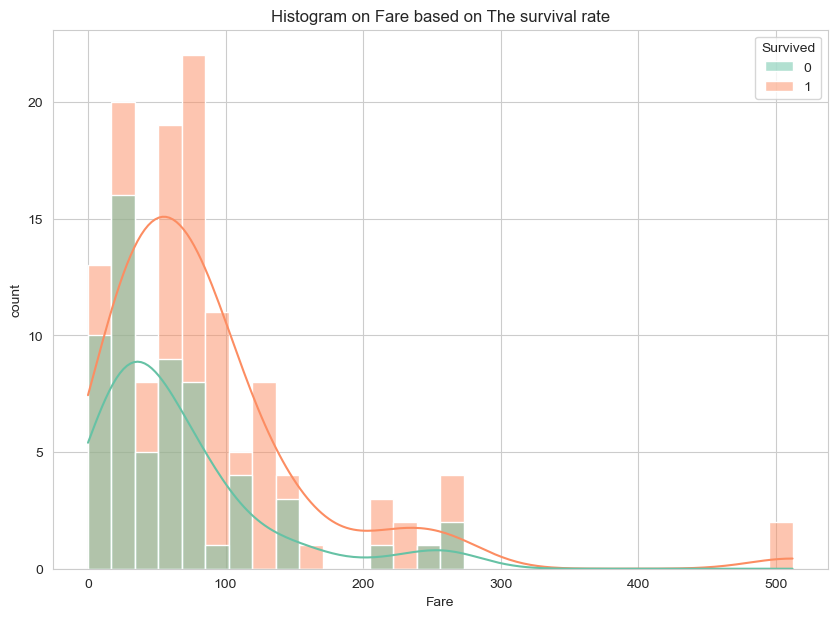

In [25]:
##investigate if those that paid high Fare had higher chanceof surviving
plt.figure(figsize=(10,7))
sn.histplot(x='Fare',hue='Survived',data=train,bins=30,kde=True,palette='Set2',alpha=0.5)
plt.title('Histogram on Fare based on The survival rate')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,51-60
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0-10
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,41-50
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,31-40
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,51-60
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,11-20


In [31]:
train.to_csv('train2.csv',index=False)